# Gender Analysis
Include information and graphs that help answering the following questions
* Do men or women dominate speaking roles in Hollywood movies?
* Has gender balance in speaking roles changed over time?
* Do films in which men do more speaking make a lot more money than films in which women speak more?

## Some graphs to include
Plot the following by year
* General proportion of male lead.
* Proportion of words spoken.
* Lead age average by gender
* Words per non-lead person on average depending on gender (the same proportion stands as with the lead?)

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
sns.set_theme(style="darkgrid")

In [225]:
# Load the dataset
url = 'data/train.csv'
data = pd.read_csv(url)

In [226]:
data.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [227]:
years = np.unique(data['Year']) # create array of years for which we have data
years = years[years > 1980] # Start from 1981, before there is not so much data

In [228]:
years_dict = {'Year': years} # create array of years for which we have data
years_df = pd.DataFrame(data=years_dict) # create a dataframe with a first column 'Year'
years_df.set_index('Year');

In [229]:
# Populate years_df with leads by gender by year
male_leads_per_year = []
female_leads_per_year = []
for year in years:
    years_lead_index = data[(data['Year'] == year)].index
    num_movies = len(data.iloc[years_lead_index])
    try:
        male_leads_per_year.append(data.iloc[years_lead_index].Lead.value_counts().Male)
    except AttributeError: # If there are no Male leads that year
        male_leads_per_year.append(0)
    
    female_leads_per_year.append((num_movies - male_leads_per_year[-1])/num_movies)
    male_leads_per_year[-1] = male_leads_per_year[-1] / num_movies

years_df['Female lead %'] = female_leads_per_year
years_df['Male lead %'] = male_leads_per_year

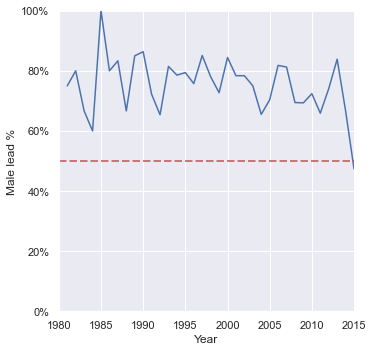

In [230]:
a_plot = sns.relplot(data=years_df, x=years_df['Year'], y='Male lead %', kind='line');
a_plot.set(xlim=(1980,2015), ylim=(0,1))
a_plot.ax.axline(xy1=(1980, 0.5), slope=0, color="r", dashes=(5, 2))
a_plot.ax.yaxis.set_major_formatter(PercentFormatter(1))